# Section 01 | Video 03 | Simple Image Transformations

# Reading the images from files

In [1]:
#Let's import OpenCV module
import cv2

import matplotlib.pyplot as plt

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
#import sys             
#print('\n'.join(sys.path))
#pip list" 

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Now we'll specify the path to our image
image_path = 'data/test.jpg'

#We'll use OpenCV's built-in function 'imread' to read the image
#Specify the image_path in the imread function
image = cv2.imread(image_path)

#If image is loaded successfully
#Go ahead and print the details
if image is not None:
    print('Image Loaded Successfully')

Image Loaded Successfully


### Using the same image to resize

In [3]:
#.shape returns height, width, channels
print(image.shape) 

#We'll using OpenCV's resize function to resize the image
resized_image = cv2.resize(image, (200,200))

#.shape returns height, width, channels
print(resized_image.shape) 

# cv2.imshow('Original', image)
# cv2.imshow('Resized', resized_image)
# cv2.waitKey()

(507, 639, 3)
(200, 200, 3)


### Using the same image to flip

In [4]:
#This function will flip the image on horizontal axis
horizontal_image = cv2.flip(image, 0)

#This function will flip the image on vertical axis
vertical_image = cv2.flip(image, 1)

(-0.5, 638.5, 506.5, -0.5)

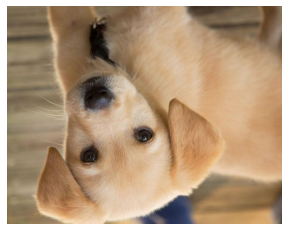

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(cv2.cvtColor(horizontal_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

(-0.5, 638.5, 506.5, -0.5)

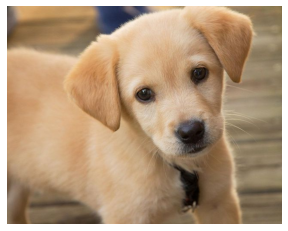

In [6]:
plt.imshow(cv2.cvtColor(vertical_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

In [7]:
#Now let's check Total pixels in the image
image.size

971919

In [8]:
#Let's verify if it's correct
image.shape

(507, 639, 3)

In [9]:
507 * 639 * 3

971919

original image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
resized to 128x256 image shape:
  Shape: (256, 128, 3)   Data type: uint8
[ [129 137 225] [120 134 227] [123 136 227] [120 137 225] [117 135 222] [104 131 224] [111 132 222] [116 128 221] ]  image_resized_128_256: uint8


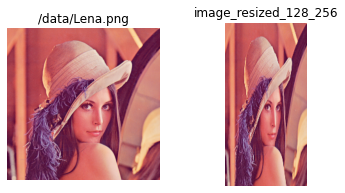

In [10]:
image = cv2.imread("data/Lena.png")

width, height = 128, 256
image_resized_128_256 = cv2.resize(image, (width, height))

print_image('original image','image',image,0,1,0,8)
print_image('resized to 128x256 image shape:','image_resized_128_256',image_resized_128_256,0,1,0,8)


plt.figure(figsize=(6,3))
plt_view_image(plt,[["/data/Lena.png",image[:,:,[2,1,0]] ],["image_resized_128_256",image_resized_128_256[:,:,[2,1,0]]   ]])
cv2.imshow('original image', image)
cv2.imshow('resized_img', image_resized_128_256)
cv2.waitKey()
cv2.destroyAllWindows()

original image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
resized to 128x256 image shape:
  Shape: (256, 128, 3)   Data type: uint8
[ [129 137 225] [120 134 227] [123 136 227] [120 137 225] [117 135 222] [104 131 224] [111 132 222] [116 128 221] ]  image_resized_128_256: uint8
resized to 0.25 0.5 image shape:
  Shape: (256, 128, 3)   Data type: uint8
[ [129 137 225] [120 134 227] [123 136 227] [120 137 225] [117 135 222] [104 131 224] [111 132 222] [116 128 221] ]  image_resized_025_05: uint8


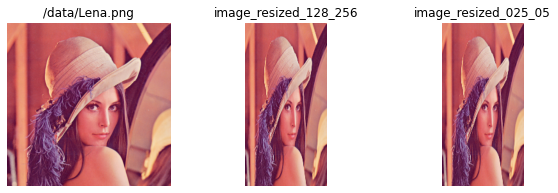

In [11]:
w_mult, h_mult = 0.25, 0.5
image_resized_025_05 = cv2.resize(image, (0, 0), image_resized_128_256, w_mult, h_mult)


######################################################
print_image('original image','image',image,0,1,0,8)
print_image('resized to 128x256 image shape:','image_resized_128_256',image_resized_128_256,0,1,0,8)
print_image('resized to 0.25 0.5 image shape:','image_resized_025_05',image_resized_025_05,0,1,0,8)

plt.figure(figsize=(10,3))
plt_view_image(plt,[["/data/Lena.png",image[:,:,[2,1,0]] ],
                    ["image_resized_128_256",image_resized_128_256[:,:,[2,1,0]]],
                    ["image_resized_025_05",image_resized_025_05[:,:,[2,1,0]]]
                    ])

cv2.imshow('image', image)
cv2.imshow('image_resized 128x256, image_resized *0.25 *0.5', np.hstack([image_resized_128_256, image_resized_025_05]))
cv2.waitKey()
cv2.destroyAllWindows()

original image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
resized to 128x256 image shape:
  Shape: (256, 128, 3)   Data type: uint8
[ [129 137 225] [120 134 227] [123 136 227] [120 137 225] [117 135 222] [104 131 224] [111 132 222] [116 128 221] ]  image_resized_128_256: uint8
resized to 0.25 0.5 image shape:
  Shape: (256, 128, 3)   Data type: uint8
[ [129 137 225] [120 134 227] [123 136 227] [120 137 225] [117 135 222] [104 131 224] [111 132 222] [116 128 221] ]  image_resized_025_05: uint8
resized to *2 *5 image shape:
  Shape: (2048, 1024, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [125 137 226] [125 137 226] [133 137 223] [133 137 223] [128 136 223] [128 136 223] ]  image_resized_2_4: uint8


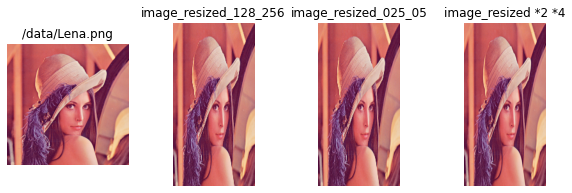

<Figure size 432x216 with 0 Axes>

In [12]:
w_mult, h_mult = 2, 4
image_resized_2_4 = cv2.resize(image, (0, 0), image_resized_025_05, w_mult, h_mult, cv2.INTER_NEAREST)


######################################################
print_image('original image','image',image,0,1,0,8)
print_image('resized to 128x256 image shape:','image_resized_128_256',image_resized_128_256,0,1,0,8)
print_image('resized to 0.25 0.5 image shape:','image_resized_025_05',image_resized_025_05,0,1,0,8)
print_image('resized to *2 *5 image shape:','image_resized_2_4',image_resized_2_4,0,1,0,8)

plt.figure(figsize=(10,3))
plt_view_image(plt,[["/data/Lena.png",image[:,:,[2,1,0]] ],
                    ["image_resized_128_256",image_resized_128_256[:,:,[2,1,0]]],
                    ["image_resized_025_05",image_resized_025_05[:,:,[2,1,0]]],
                    ["image_resized *2 *4",image_resized_2_4[:,:,[2,1,0]]]
                    ])

plt.figure(figsize=(6,3))
cv2.imshow('image', image)
cv2.imshow('image_resized 128x256, image_resized *0.25 *0.5', np.hstack([image_resized_128_256, image_resized_025_05]))
cv2.imshow('resized to *2 *5', image_resized_2_4)
cv2.waitKey()
cv2.destroyAllWindows()

original image
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  image: uint8
cv2.flip(image, 0)
  Shape: (512, 512, 3)   Data type: uint8
[ [125 137 226] [125 137 226] [133 137 223] [128 136 223] [120 138 226] [116 129 226] [123 138 228] [124 134 227] ]  img_flip_along_x: uint8
img_flip_along_x_along_y
  Shape: (512, 512, 3)   Data type: uint8
[ [124 134 227] [123 138 228] [116 129 226] [120 138 226] [128 136 223] [133 137 223] [125 137 226] [125 137 226] ]  img_flip_along_x_along_y: uint8
img_flipped_xy
  Shape: (512, 512, 3)   Data type: uint8
[ [124 134 227] [123 138 228] [116 129 226] [120 138 226] [128 136 223] [133 137 223] [125 137 226] [125 137 226] ]  img_flipped_xy: uint8


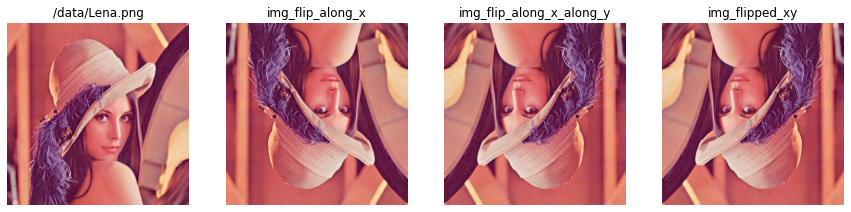

In [13]:
img_flip_along_x = cv2.flip(image, 0)
img_flip_along_x_along_y = cv2.flip(img_flip_along_x, 1)
img_flipped_xy = cv2.flip(image, -1)
# check that sequential flips around x and y equal to simultaneous x-y flip
assert img_flipped_xy.all() == img_flip_along_x_along_y.all()

######################################################
print_image('original image','image',image,0,1,0,8)
print_image('cv2.flip(image, 0)','img_flip_along_x',img_flip_along_x,511,512,0,8)
print_image('img_flip_along_x_along_y','img_flip_along_x_along_y',img_flip_along_x_along_y,511,512,504,513)
print_image('img_flipped_xy','img_flipped_xy',img_flipped_xy,511,512,504,513)

plt.figure(figsize=(15,15))
plt_view_image(plt,[["/data/Lena.png",image[:,:,[2,1,0]] ],
                    ["img_flip_along_x",img_flip_along_x[:,:,[2,1,0]] ],
                    ["img_flip_along_x_along_y",img_flip_along_x_along_y[:,:,[2,1,0]] ],
                    ["img_flipped_xy",img_flipped_xy[:,:,[2,1,0]] ],
                   ])

cv2.imshow('img_flip_along_x 128x256, img_flip_along_x_along_y, img_flipped_xy', 
           np.hstack([img_flip_along_x,img_flip_along_x_along_y, img_flipped_xy]))
cv2.waitKey()
cv2.destroyAllWindows()